---
layout: notes
chapter: 5
chapter-title: Support Vector Machines
permalink: /ml-book/chapter5/notes.html
---

## Linear SVM Classification
* This chapter is about Support Vector Machines which are capable of performing linear or nonlinear classification, regression, and even outlier detection
* They are well suited for classification of complex but small- or medium-sized datasets

The following image represents an SVM (on the right) vs. linear classifiers (left) on the Iris dataset:

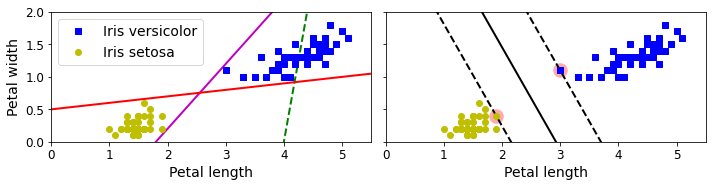

You can think of an SVM classifier as fitting the widest possible street between the classes. This is called _large margin classification_. Adding more training instances will not affect the decision boundary at all. The dashed lines in the right plot are the _support vectors_ which form the edge of the street. SVMs are very sensitive to feature scales.

### Soft Margin Classification
* Hard margin classification is when we impose the condition that _all_ classifications are separate by a single line
  * This isn't possible if the data is not linearly separable
  * It's very sensitive to outliers
* To avoid these pitfalls soft margin classification is used
* The goals of soft margin classification are:
  * Make the street as wide as possible
  * Limit the number of margin violations
* The balance of these goals is controlled by the C hyperparameter. Smaller C values lead to a wider street, but more margin violations.
* If your SVM model is overfitting you can try reducing C to have it generalize better

## Nonlinear SVM Classification
* Not all datasets are linearly separable
* You can sometimes add features (the example Geron uses is squaring a variable x where |x| < 2 is positive, else negative classification)

### Polynomial Kernel
* Adding low order polynomial features like won't work with very complex datasets
* And if high order polynomial features are added then the model becomes too slow

#### The Kernel Trick
Geron didn't really explain this all that much. But, [here is a really good explanation of the kernel trick](https://towardsdatascience.com/the-kernel-trick-c98cdbcaeb3f#:~:text=The%20%E2%80%9Ctrick%E2%80%9D%20is%20that%20kernel,the%20data%20by%20these%20transformed). Basically, instead of squaring, cubing, etc. each feature and concatenating them as a new feature, using a kernel allows you to compute the square, cube, etc. of each feature from just the original features. Thus, it saves computational time.

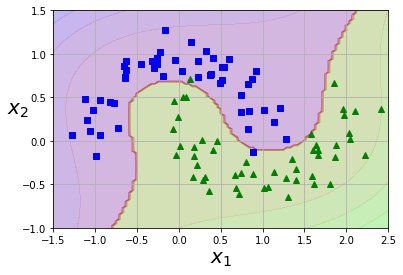

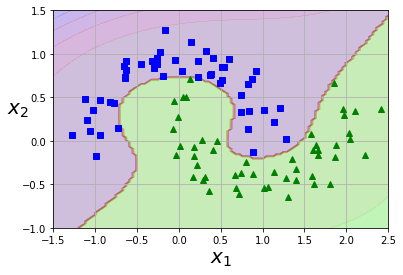

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X, y)

poly_kernel_svm_clf10 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=5, C=5))
])
poly_kernel_svm_clf10.fit(X, y)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.figure()
plot_predictions(poly_kernel_svm_clf10, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

### Adding Similarity Features
A similarity function such as the Gaussian Radial Basis Function (RBF) can be used to add features which help increase dimensionality. This transform a one dimension feature into two dimensions by comparing the distance to landmarks within the dataset. How to select landmark? In an ideal world you'd try all possible landmarks, but that would increase the feature matrix to m x m.

### Gaussian RBF Kernel
You can once again use the kernel trick with the RBF.

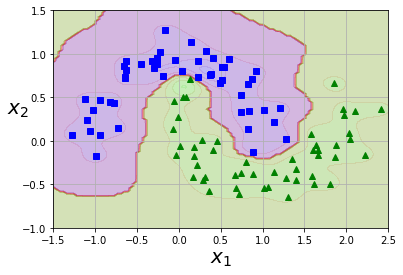

In [30]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=10, C=100))
])
rbf_kernel_svm_clf.fit(X, y)
plot_predictions(rbf_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

#### Rules of thumb when picking kernels
* Grid search is your friend
* Try linear kernel first
* If the training set is not too large, try Gaussian RBF kernel
* Then try others if you have more time

### Computational Complexity
* `LinearSVC` does not support the kernel trick, but scales linearly with the number of samples and features
* `SVC` supports the kernel trick, but becomes slow (O(m^3 x n)) with a large number of samples

## SVM Regression
* 